The sole purpose of this file is to convert the CombinedCSI.mat file from the pipeline to a separate data.npy and mask.npy files for easier usage. You only have to insert the correct data folder name below and run the notebook. A CombinedCSI.mat file in that folder is required

In [ ]:
data_folder_name = "Tumor_2_normalized_tMPPCA_5D"

from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

#### load matlab data ####
data_Part1 = loadmat(f'{data_folder_name}/FabianPart1.mat')
Daten_Part1 = data_Part1['csi']['Data'][0,0]

data_Part2 = loadmat(f'{data_folder_name}/FabianPart2.mat')
Daten_Part2 = data_Part2['csi']['Data'][0,0]
#Daten = low_rank_5d(Daten, 8)

Daten = np.concatenate((Daten_Part1, Daten_Part2), axis = -1)

Daten = Daten/10885.352
#### save data as numpy arrays ####
#np.save(f'{data_folder_name}/data.npy', Daten)
# np.save(f'{data_folder_name}/mask.npy', mask)



In [12]:
max = np.max(np.abs(Daten))

print(max)

0.89008117


In [14]:
test = np.load('Tumor_2/data.npy')

max = np.max(np.abs(test))

print(max)

10885.352


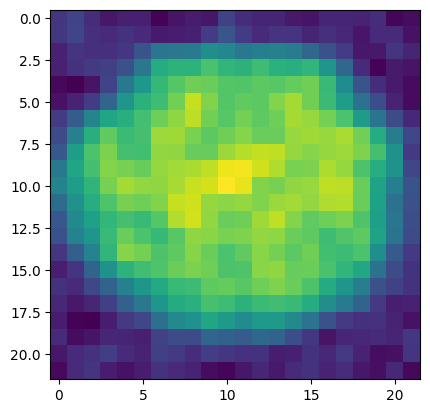

In [4]:
data = np.load(f'{data_folder_name}/data.npy')

z,t,T = 10,1,7

Slice = np.abs(Daten)[:,:,z,t,T]

plt.imshow(Slice)